In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/archive (8)/HousingData.csv')
df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)

In [6]:
df['ZN'].fillna(df['ZN'].mean(),inplace=True)

In [7]:
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)

In [8]:
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)

In [9]:
df['AGE'].fillna(df['AGE'].mean(),inplace=True)

In [10]:
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.corr()['MEDV'].sort_values() #Check correlation of all features with MEDV to understand which features are most relevant for prediction.

LSTAT     -0.721975
PTRATIO   -0.507787
INDUS     -0.478657
TAX       -0.468536
NOX       -0.427321
RAD       -0.381626
AGE       -0.380223
CRIM      -0.379695
CHAS       0.179882
DIS        0.249929
B          0.333461
ZN         0.365943
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [23]:
x=df.loc[:,['LSTAT','PTRATIO','RM']]
y=df.loc[:,'MEDV']
x.shape,y.shape

((506, 3), (506,))

In [24]:
x

,LSTAT,PTRATIO,RM
0,4.980000,15.3,6.575
1,9.140000,17.8,6.421
2,4.030000,17.8,7.185
3,2.940000,18.7,6.998
4,12.715432,18.7,7.147
...,...,...,...
501,12.715432,21.0,6.593
502,9.080000,21.0,6.120
503,5.640000,21.0,6.976
504,6.480000,21.0,6.794


In [25]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [32]:
scaler=StandardScaler()

In [33]:
scaler.fit(x_train)

StandardScaler()

In [39]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
model=Sequential()

In [54]:
model.add(Dense(128,input_shape=(3,),activation='relu',name='Input'))
model.add(Dense(64,activation='relu',name='Layer_1'))
model.add(Dense(1,activation='linear',name='0utput'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

ValueError: All layers added to a Sequential model should have unique names. Name 'Input' is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Input (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Innput (Dense)                       │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Laayer_1 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 0utput (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,922 (132.51 KB)

 Trainable params: 33,922 (132.51 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 374.1995 - mae: 16.5011 - val_loss: 177.6172 - val_mae: 11.8176
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 123.3753 - mae: 8.6997 - val_loss: 184.3678 - val_mae: 9.0990
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94.1522 - mae: 7.0374 - val_loss: 162.4621 - val_mae: 9.0177
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 92.4874 - mae: 6.8640 - val_loss: 160.3359 - val_mae: 9.1849
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104.1712 - mae: 7.5302 - val_loss: 169.6480 - val_mae: 8.8737
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87.5214 - mae: 6.7311 - val_loss: 158.8293 - val_mae: 9.3099
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 98.8615 - mae: 7.4423 - val_loss: 159.6082 - val_mae: 9.1691
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 88.0315 - mae: 6.9175 - val_loss: 157.8740 - val_mae: 9.3859
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━

In [57]:
output = model.evaluate(x_test,y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1890.3414 - mae: 42.4002


In [58]:
y_pred = model.predict(x=x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


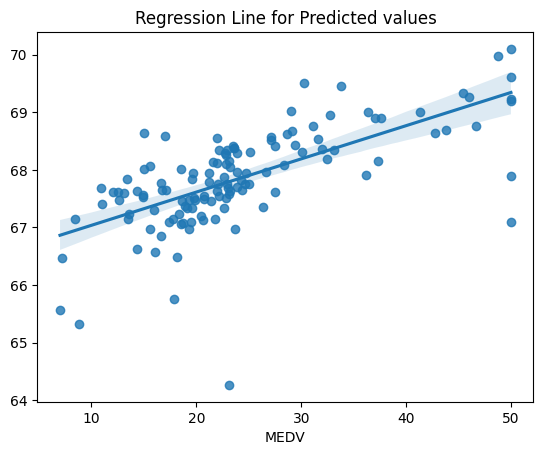

In [60]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [61]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")


Mean Squared Error: 1984.85595703125
Mean Absolute Error: 43.54216766357422


In [62]:
print(*zip(y_pred,y_test))

(array([68.09179], dtype=float32), 28.4) (array([68.759735], dtype=float32), 31.1) (array([68.41882], dtype=float32), 23.5) (array([67.96118], dtype=float32), 26.6) (array([67.8399], dtype=float32), 19.6) (array([67.63107], dtype=float32), 14.3) (array([69.235504], dtype=float32), 50.0) (array([66.62532], dtype=float32), 14.3) (array([67.49673], dtype=float32), 20.7) (array([68.90796], dtype=float32), 37.6) (array([67.194824], dtype=float32), 20.4) (array([68.41594], dtype=float32), 27.5) (array([67.906006], dtype=float32), 36.2) (array([68.36662], dtype=float32), 32.0) (array([68.351746], dtype=float32), 33.1) (array([69.97355], dtype=float32), 48.8) (array([67.7585], dtype=float32), 24.6) (array([67.35222], dtype=float32), 26.4) (array([68.04677], dtype=float32), 23.2) (array([68.57986], dtype=float32), 17.0) (array([69.00539], dtype=float32), 41.3) (array([67.56431], dtype=float32), 14.9) (array([68.017944], dtype=float32), 18.5) (array([67.74994], dtype=float32), 25.0) (array([68.9